## Aviation accident data analysis


### Introduction

For this project, I have compiled data on the aviation accidents which I intend to investigate. The objective is to analyze the factors contributing to these incidents and make educated recommendations regarding the safest and most reliable aircraft models for purchasing. The dataset includes, among other, the type of airplanes that is the Make and the model, the weather, and the place of the accident.

### Data Summary

*   Aircraft Make and Model: Information concerning the particular make and model of the aircraft involved in accidents as described by the pilot or aviation accident records.

*  Weather Conditions: Information regarding the meteorological conditions that prevailed during the event.

*  Country: The place where the aviation accident occurred classified by country.

*  Total.Fatal.injuries: The number of deaths the accidents caused.







## Importing Libraries

In the cell below I have imported all the necessary libraries to use during my data analysis.

In [2]:
# Importing the necessary libraries to use.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#using set option so that i get to display all the columns
pd.set_option('display.max_columns', None)

### Loading data.
In the cell below I have loaded the dataset that I will use for analysis.
Then displayed the first five rows of the data to familiarize how the data looks like.

In [3]:
# Loading the data
aviation_df = pd.read_csv('/content/AviationData.csv', encoding = 'latin-1', low_memory = False);

In [4]:
# Displaying the first few rows
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Getting to know the datatype of the data contained in each column, also the total number of rows and columns in our dataset and also get to know columns with missing values

In [5]:
# Getting information about our dataset
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [6]:
# Checking for the total number of rows with missing data in each column
missing_data = aviation_df.isna().sum()
missing_data

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport.Code,38757
Airport.Name,36185


In [7]:
aviation_df.shape

(88889, 31)

## Data Cleaning

Here I have dropped the columns and rows with more missing values and those with less missing values I have replaced with the mode.The reason as to why I have  dropped columns and rows with more missing values is that if I try to replace with mean,median or mode the data might be biased. I have also replaced those with less mising values with mode bcause the are categorical data.

In [8]:
# Dealing with missing values; by dropping columns that have more than 40% missing data.
#setting a a limit for the least number of missing rows a column should have
cutoff = 0.4
missing_rows = aviation_df.isna().sum()
df_length = len(aviation_df)
col = [x for x in aviation_df.columns if missing_rows[x] / df_length > cutoff]
aviation_df.drop(columns = col, inplace = True)

In [9]:
# Displays the total number of rows and columns in our dataset
aviation_df.shape

(88889, 23)

In [10]:
# Making a copy of our original dataset so that we work with it without making changes to our original dataset
aviation_df1 = aviation_df.copy()

In [11]:
# checking for duplicates
duplicates = aviation_df1.duplicated().sum()
duplicates

0

In [12]:
aviation_df1.isna().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Injury.Severity,1000
Aircraft.damage,3194
Registration.Number,1382
Make,63


In [13]:
# dropping rows with more missing values
threshold = 1000
cols_with_missing = aviation_df1.columns[aviation_df1.isna().sum() > threshold]
aviation_df1.dropna(subset = cols_with_missing, inplace = True)
aviation_df1.shape

(34753, 23)

In [14]:
aviation_df1.isna().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,3
Country,142
Injury.Severity,0
Aircraft.damage,0
Registration.Number,0
Make,7


In [15]:
# Replacing missing values with mode
column_list = ['Location', 'Country', 'Make', 'Model']
for x in column_list:
  aviation_df1[x].fillna(aviation_df[x].mode()[0],inplace=True)

In [16]:
# Viewing the first five rows of our cleaned data
aviation_df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,N7967Q,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982


In [17]:
aviation_df1.isnull().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,0
Country,0
Injury.Severity,0
Aircraft.damage,0
Registration.Number,0
Make,0


##Aircraft Make and Model Analysis
In the cell below I examine the distribution of accidents across various aircraft makes and models. This analysis aims to uncover potential patterns or correlations between specific aircraft types and accident frequency.

In the cell below I start by examing the accident trends among the makes of the aircrafts.

In [18]:
# Changing the model names all to uppercase to avoid plotting tha same model twice.
aviation_df1['Model'] = aviation_df1['Model'].apply(lambda x: x.upper())

Make
Cessna      12327
Piper        6599
Beech        2331
Bell         1062
Grumman       661
Mooney        577
Bellanca      512
Boeing        459
Hughes        425
Robinson      379
Name: count, dtype: int64


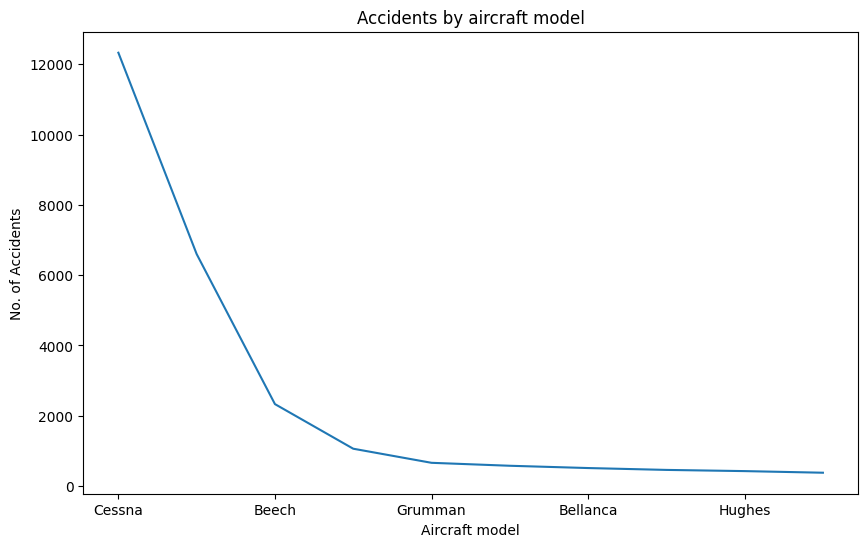

In [19]:
# Getting the top 10 aircraft models that were involved in accidents
top_aircrafts = aviation_df1['Make'].value_counts().head(10)
print(top_aircrafts)
# plotting the total number of accidents by each of the top 10 aircraft models
plt.figure(figsize =(10, 6))
top_aircrafts.plot(kind='line')
plt.title('Accidents by aircraft model')
plt.xlabel('Aircraft model')
plt.ylabel('No. of Accidents')
plt.show()

Here I examine the accident trends among the models of the makes of the aircrafts

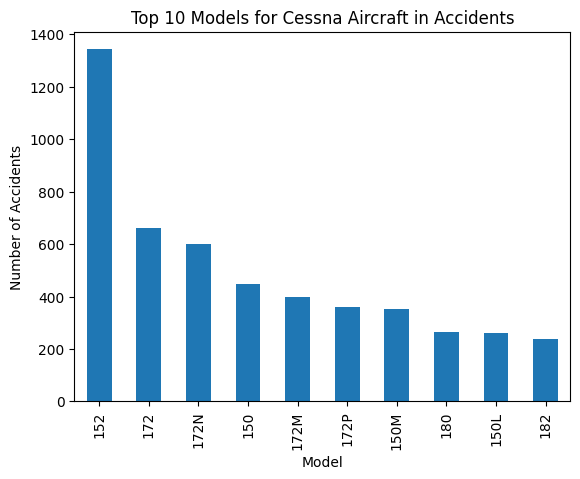

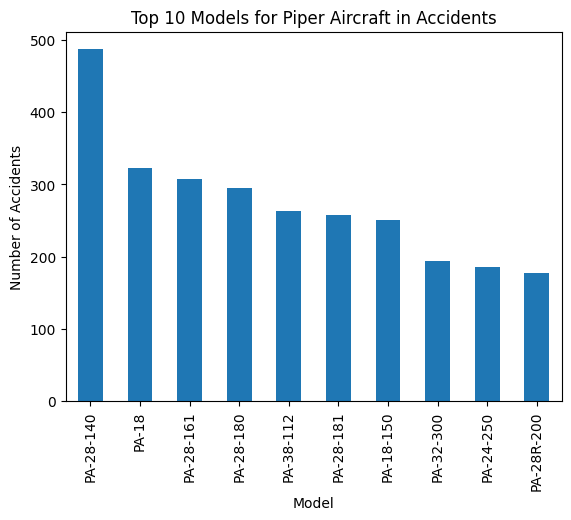

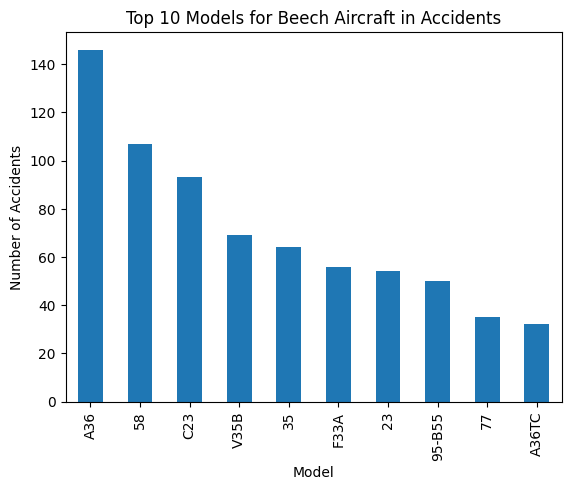

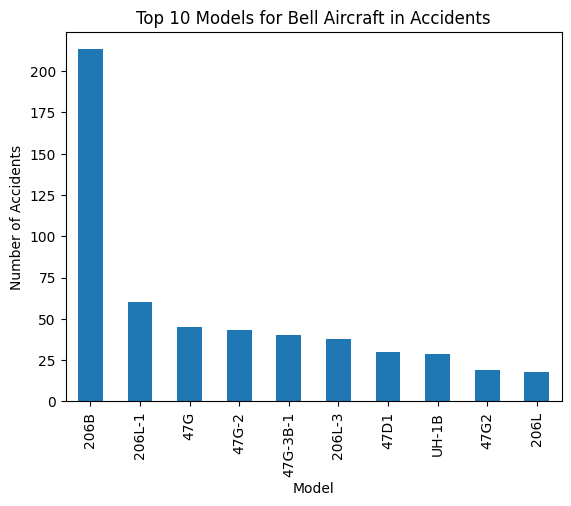

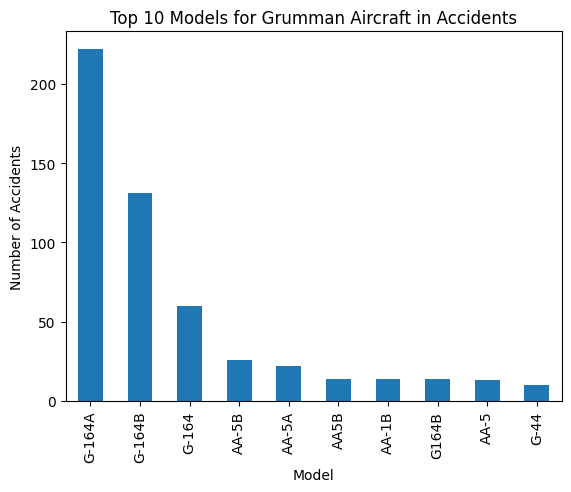

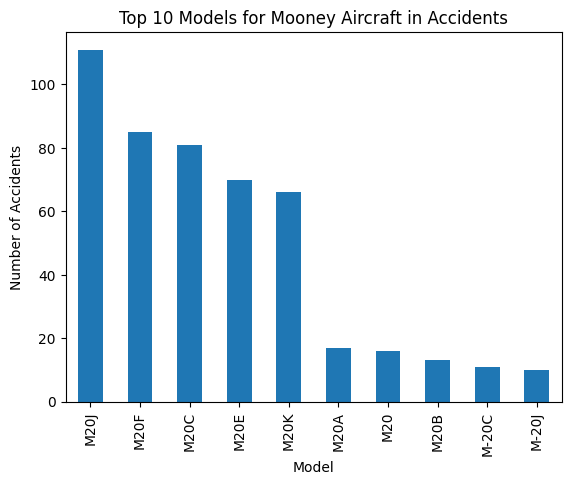

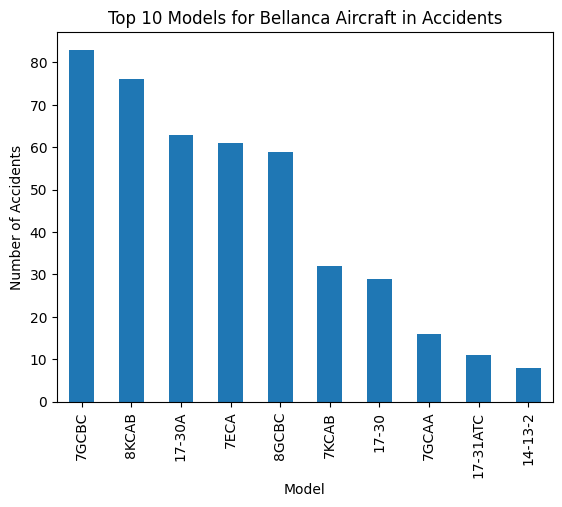

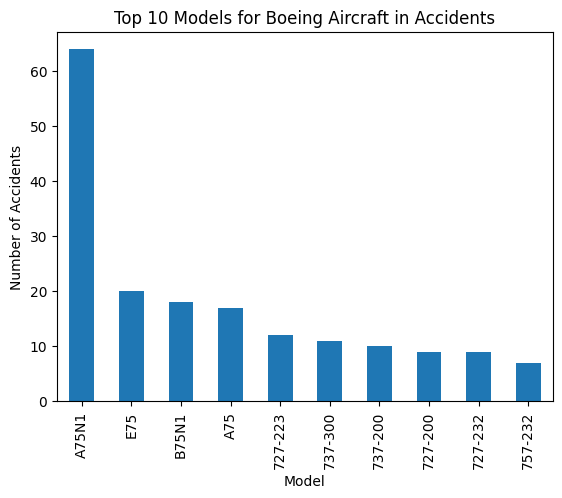

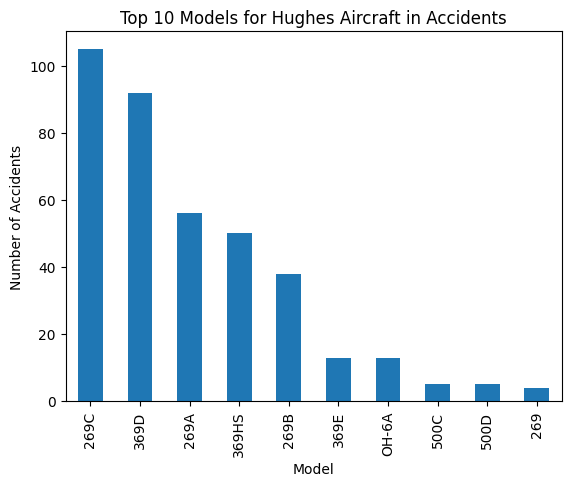

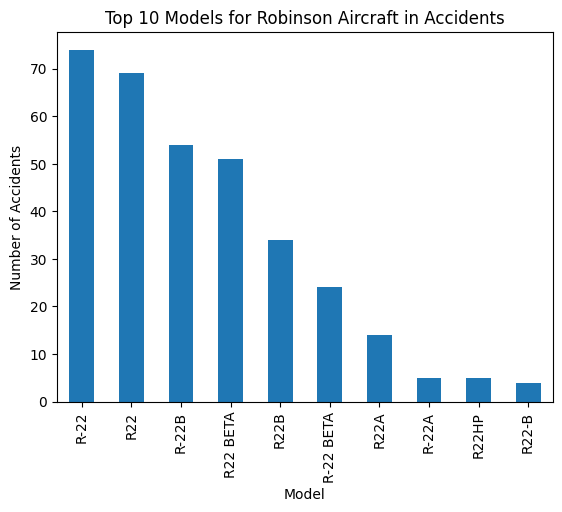

In [26]:
# Step 1: Getting the top 10 aircraft makes that were involved in accidents
top_10_makes = aviation_df1['Make'].value_counts().head(10).index

# Step 2: Visualize the top 10 models for each of the top 10 makes
for make in top_10_makes:
    # Filter the data for the current make
    make_data = aviation_df1[aviation_df1['Make'] == make]

    # Get the top 10 models for this make
    top_10_models = make_data['Model'].value_counts().head(10)

    # Create a bar plot
    top_10_models.plot(kind='bar', title=f'Top 10 Models for {make} Aircraft in Accidents')
    plt.xlabel('Model')
    plt.ylabel('Number of Accidents')
    plt.show()

## Checking for the aircraft accidents

In this part I examine how many aircraft accidents occured in each year.

In [27]:
# Converting 'Event.Date' column to the correct datetime format
aviation_df1['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'], errors = 'coerce')

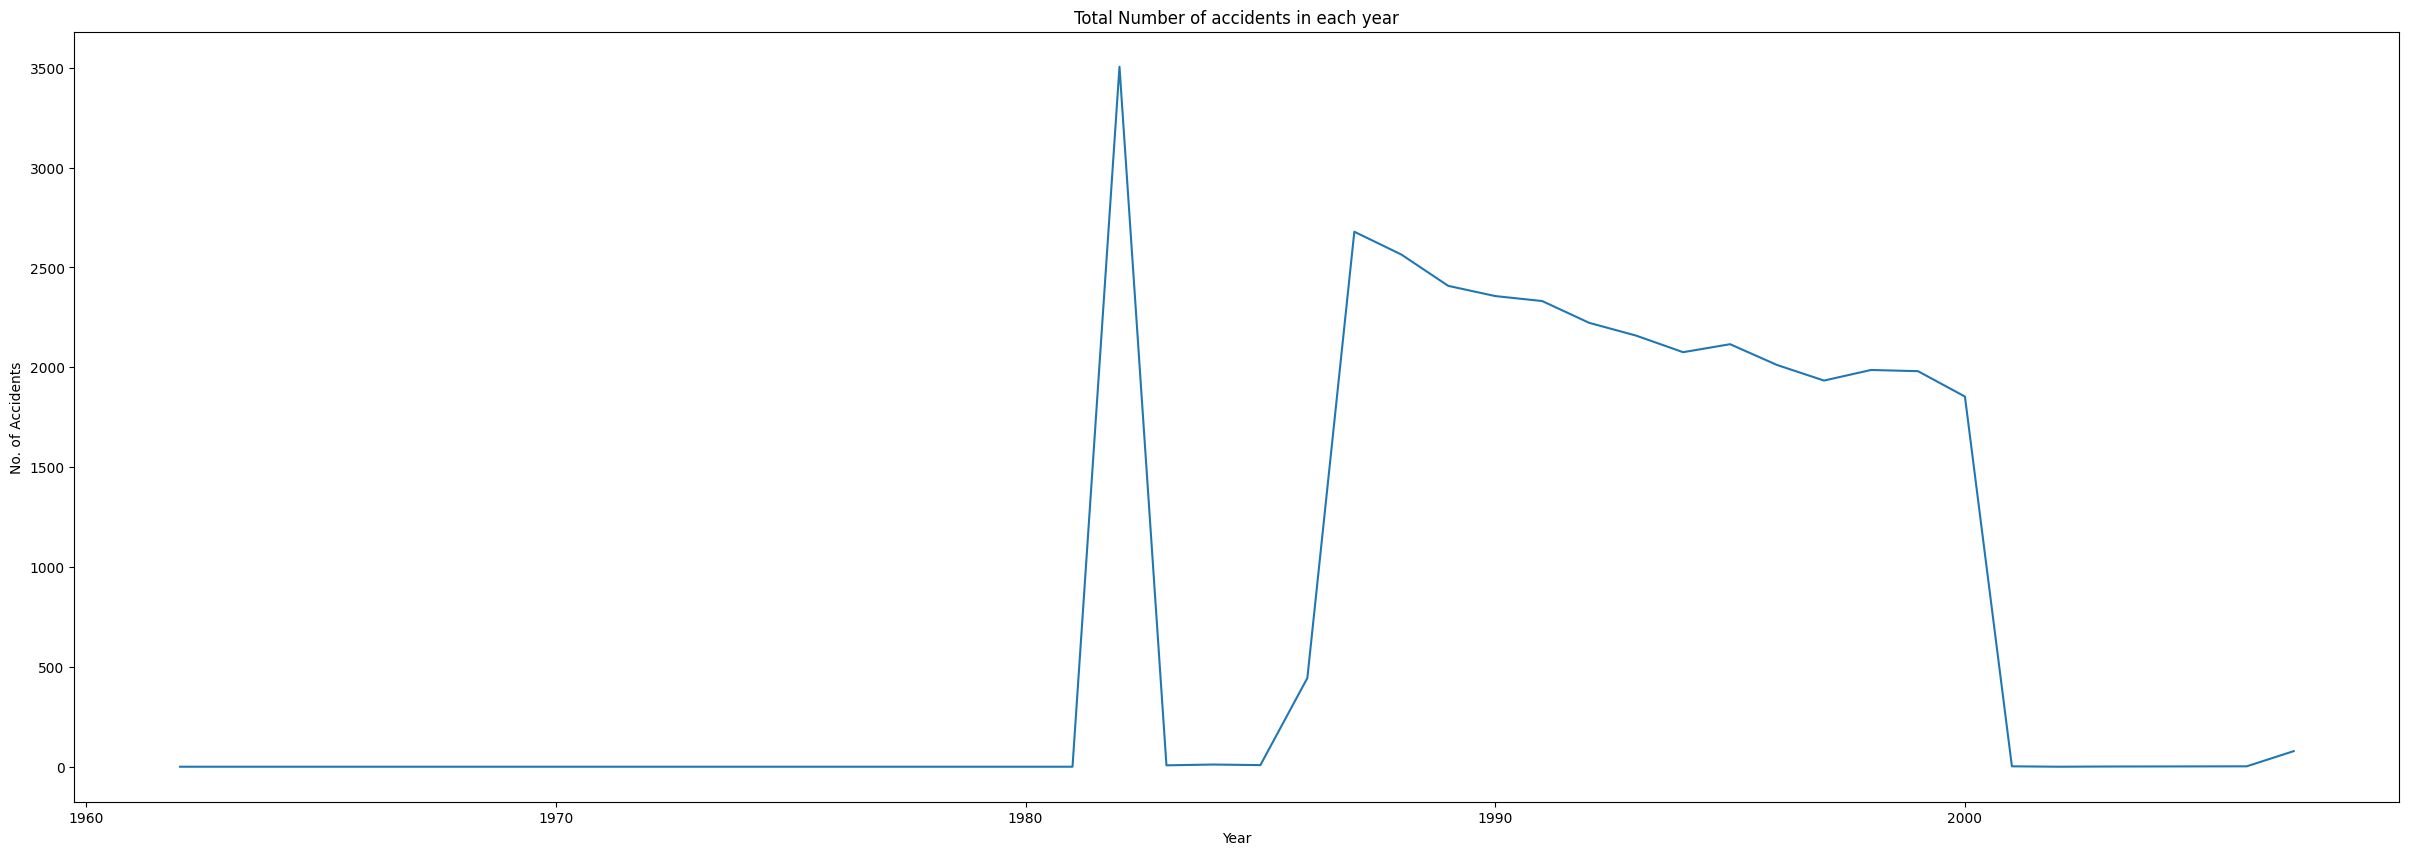

In [28]:
# Extracting the year from the 'Event.Date' column
aviation_df1['Year'] = aviation_df1['Event.Date'].dt.year

# Plotting the number of accidents that occured over the years
yearly_accidents = aviation_df1['Year'].value_counts().sort_index(ascending = True)

plt.figure(figsize =(30, 10))
yearly_accidents.plot(kind = 'line')
plt.title('Total Number of accidents in each year')
plt.xlabel('Year')
plt.ylabel('No. of Accidents')
plt.show()

##Weather Conditions Analysis
Assessing the influence of weather conditions on aviation accidents is essential. Through exploratory data analysis (EDA), in the cell below I'll investigate the distribution of accidents under different weather conditions, identify trends, and explore the role weather plays in contributing to incidents.

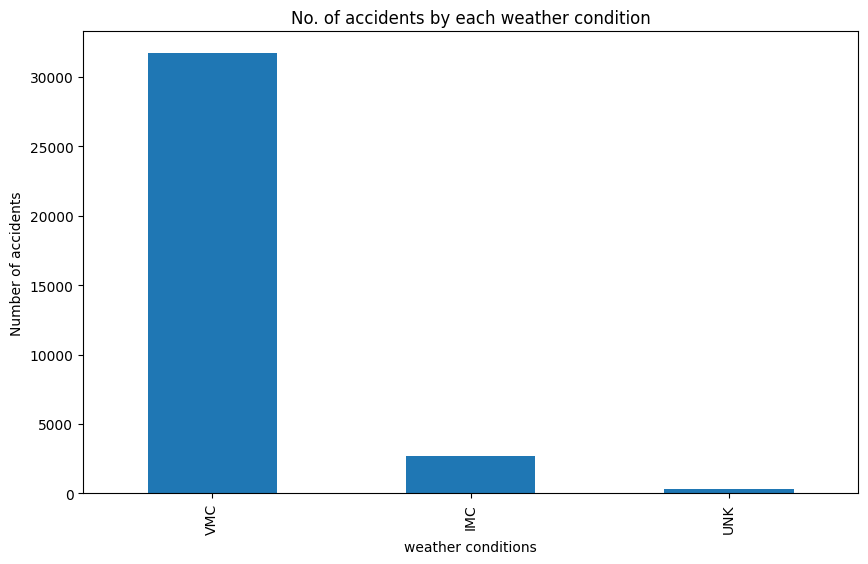

In [29]:
# Number of accidents that occured by each weather condition.
aviation_df1['Weather.Condition'] = aviation_df1['Weather.Condition'].apply(lambda x: x.upper())
weather = aviation_df1['Weather.Condition'].value_counts()

plt.figure(figsize = (10, 6))
weather.plot(kind = 'bar')
plt.title('No. of accidents by each weather condition')
plt.xlabel('weather conditions')
plt.ylabel('Number of accidents')
plt.show()

Below I draw a graph that outlines the phases of flight (takeoff, cruise, approach, landing) where accidents are most frequent. And check for the number of accidents that have happened in each phase.

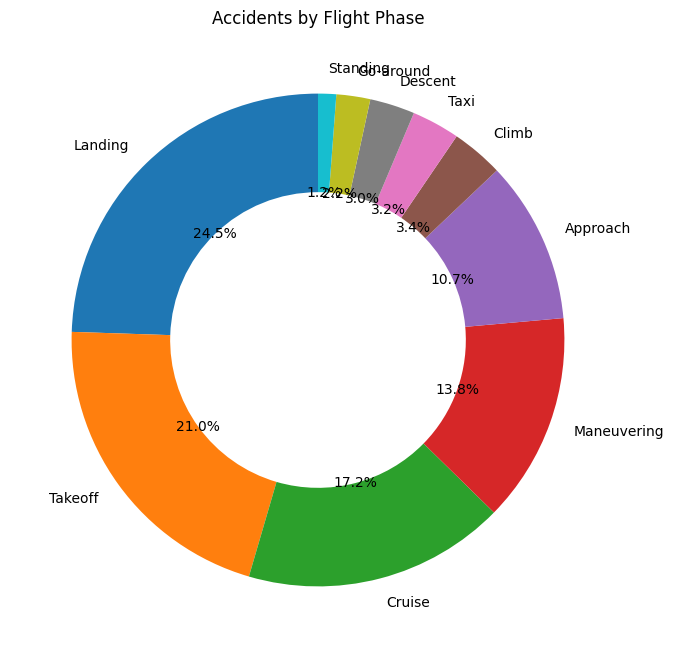

In [30]:
# Number of accidents by phase of flight
phase = aviation_df1['Broad.phase.of.flight'].value_counts().head(10)
# Create a pie chart with a hole in the middle to make it a doughnut chart
plt.figure(figsize=(8,8))
plt.pie(phase, labels=phase.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})

# Add a title
plt.title('Accidents by Flight Phase')

# Display the chart
plt.show()

## Fatality check.

Below I check for the fatality rate of each aircraft make.

In [25]:
# Summation of casualities and accidents for each aircraft model
casualities_per_model = aviation_df1.groupby('Make')['Total.Fatal.Injuries'].sum()
accidents_per_model = aviation_df1['Make'].value_counts()
casuality_rate = (casualities_per_model / accidents_per_model).sort_values(ascending = False)
casuality_rate.head(20)

,0
Make,
Jetstream,11.500000
Atr,11.333333
American Yankee,6.000000
Robertson,5.750000
Martin Company,5.000000
Pilatus Britten-norman,4.000000
Aerospatiale/socata,4.000000
Craven's Quickie,4.000000
Mark Ewart,4.000000


## Conclusion

Aircraft Model Safety: The Boeing aircraft has consistently demonstrated lower accident and fatality rates compared to other aircraft models, making it a top contender for purchase.

Weather's Role: A substantial number of accidents occur under IMC, highlighting the need for aircraft equipped with advanced weather navigation systems to mitigate risk.

Flight Phase Vulnerability: Most accidents happen during landing and approach phases, suggesting that aircraft with strong performance during these critical moments should be prioritized.